# BA, dust fluid, $512^2$

| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  10/25/2024          |
| Updated |  11/01/2024          |

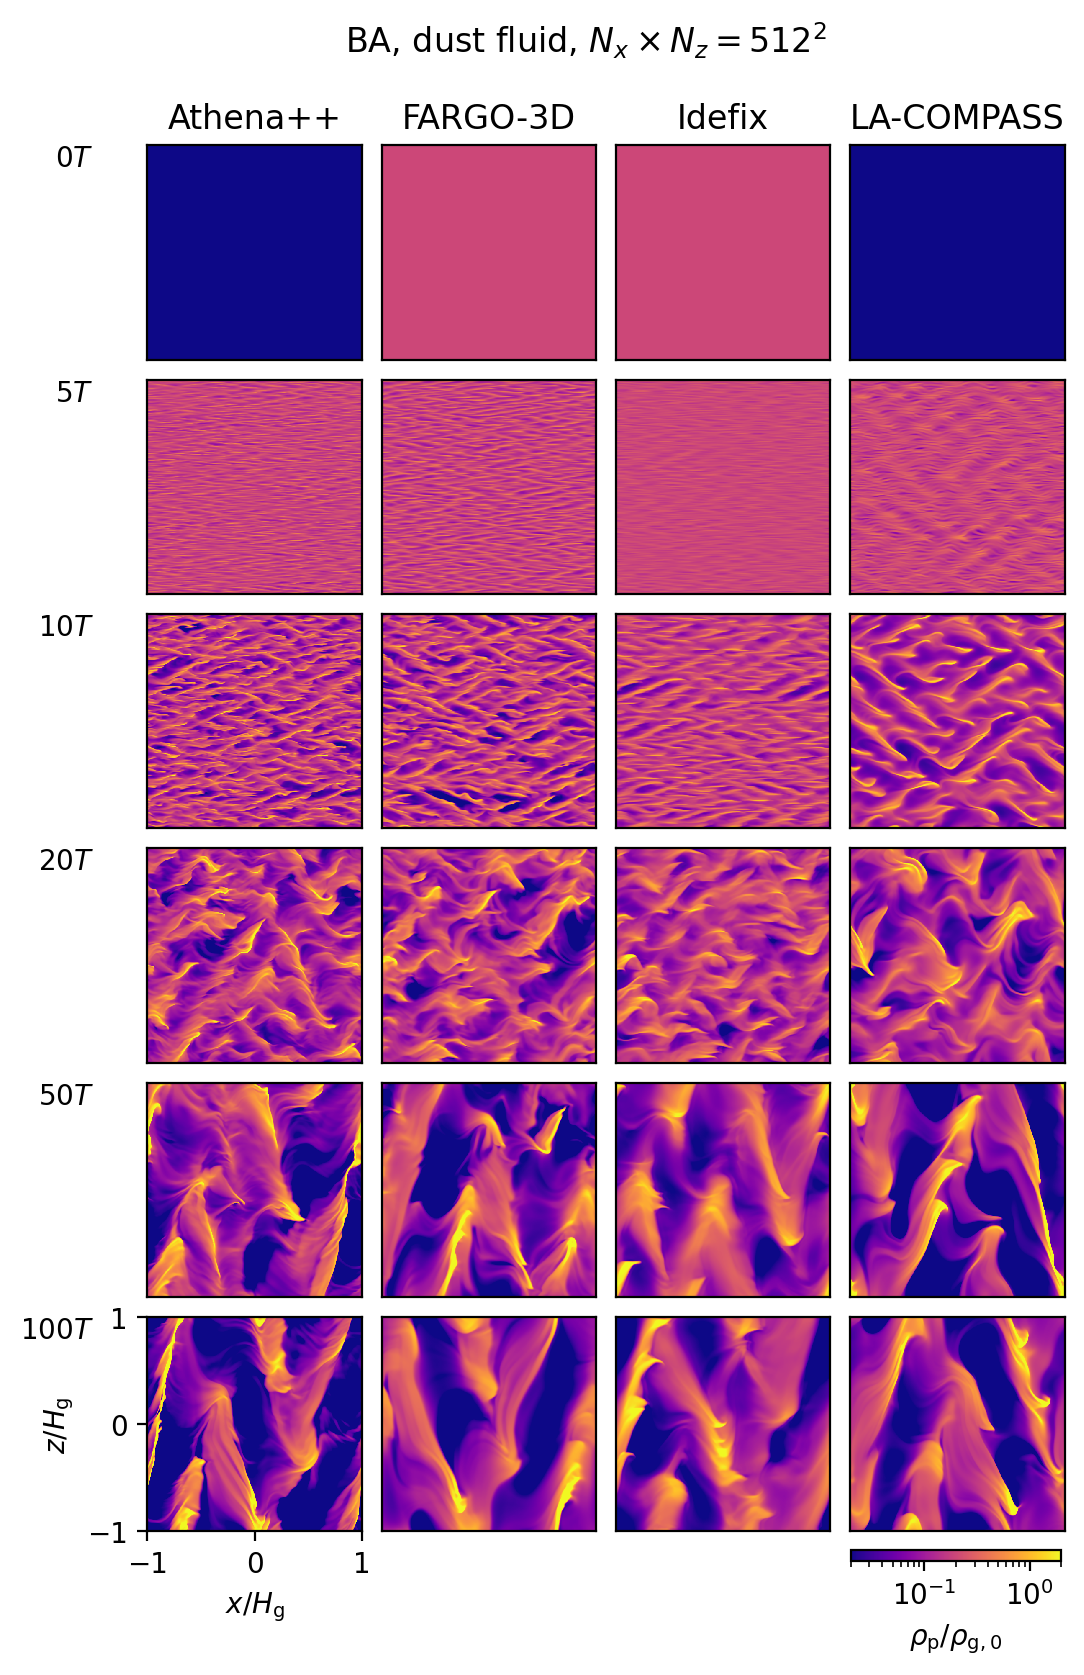

In [74]:
#===============================================================================
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np

root = f'/home/stanley/github/pfitsplus/sicc/data/'
model = 'unstratified'
problem = 'BA'
dust = 'fluid'
n_p = ''
res = 512
variation = f'dust_{dust}/{n_p}/{res}'
codes = ['Athena++', 'FARGO-3D', 'Idefix', 'LA-COMPASS']
times = [0, 5, 10, 20, 50, 100]
vmin, vmax = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%
fig = plt.figure(figsize=(8, 9), dpi=200)
if dust == 'particles':
    fig.suptitle(rf'{problem}, $n_\mathrm{{p}} = {n_p[2:]}, N_x \times N_z = {res}^2$',
                 y=0.95)
elif dust == 'fluid':
    fig.suptitle(rf'{problem}, dust fluid, $N_x \times N_z = {res}^2$',
                 y=0.95)
ax_grid = AxesGrid(fig, 111, nrows_ncols=(len(times), len(codes)),
                   direction='column', axes_pad=0.1, share_all=True,
                   label_mode='1')

for j, code in enumerate(codes):
    path = f'{root}/{model}/{problem}/{variation}/{code}'
    ax_grid[j*len(times)].set_title(code)
    for i, time in enumerate(times):
        try:
            snap = np.load(f'{path}/{time}.npz')
            x = snap['x']
            z = snap['z']
            rhop = snap['rhop']
        except FileNotFoundError:
            rhop = np.zeros_like(res**2, shape=(res, res))
        clip = np.clip(rhop, vmin, vmax)
        pcm = ax_grid[j*len(times)+i].pcolormesh(x, z, clip, cmap='plasma',
                                                 rasterized=True,
                                                 norm=colors.LogNorm(vmin=vmin,
                                                                     vmax=vmax))
        if j == 0:
            ax_grid[i].text(-0.25, 0.9, rf'{time}$T$', ha='right',
                            transform=ax_grid[i].transAxes)
        ax_grid[j*len(times)+i].tick_params(bottom=False, left=False)

x1 = ax_grid[-1].get_position().x1 - 0.06 # TODO: OPTMIZE
plt.colorbar(pcm, orientation='horizontal', shrink=0.17, anchor=(x1, -0.15),
             label=r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$')
ax_grid[len(times)-1].set(xlabel=r'$x/H_\mathrm{g}$', ylabel=r'$z/H_\mathrm{g}$')
ax_grid[len(times)-1].tick_params(bottom=True, left=True)
plt.savefig(f'{problem}-{dust}-{res}.png', dpi=600, bbox_inches='tight', pad_inches=0.01)


## Data compliance

In [8]:
import numpy as np

root = f'/home/stanley/github/pfitsplus/sicc/data'
model = 'unstratified'
problem = 'BA'
dust = 'fluid'
n_p = ''
res = 512
variation = f'dust_{dust}/{n_p}/{res}'
code = 'Athena++'
prefix = 'data_coordinates_dust_rho_'
suffix = '_orbits.npz'
path = f'{root}/{model}/{problem}/{variation}/{code}'
times = [5, 10, 20, 50, 100]

# Load separate grid
# grid = np.load(f'{path}/old/grid_varz.npz', mmap_mode='r')
# x = grid['x']
# z = grid['z']

# Inspect
np.load(f'{path}/old/{prefix}{times[1]:03}{suffix}', mmap_mode='r').files
# np.shape(snap['rhop'])

# Exception
# time = 0
# snap = np.load(f'{path}/old/{prefix}{time:04}{suffix}')
# np.savez_compressed(f'{path}/{time}', x=x, z=z,
#                     rhop=snap['rhop'].transpose())

# Standardize
for time in times:
    snap = np.load(f'{path}/old/{prefix}{time:03}{suffix}')
    np.savez_compressed(f'{path}/{time}', x=snap['x_coord'], z=snap['z_coord'],
                        rhop=snap['rho_d'])

In [54]:
import numpy as np

root = f'/home/stanley/github/pfitsplus/sicc/data'
model = 'unstratified'
problem = 'BA'
dust = 'fluid'
n_p = ''
res = 512
variation = f'dust_{dust}/{n_p}/{res}'
code = 'FARGO-3D'
prefix = 'dustdensity'
suffix = '.npz'
path = f'{root}/{model}/{problem}/{variation}/{code}'
times = [0, 31, 63, 126, 314]

# Load separate grid
grid = np.load(f'{path}/old/grid.npz', mmap_mode='r')
x = grid['x']
z = grid['z']

# Inspect
np.load(f'{path}/old/{prefix}{times[0]}{suffix}', mmap_mode='r').files
# np.shape(snap['arr_0'])

# Exception
time = 628
snap = np.load(f'{path}/old/{prefix}{time}.npy')
time = 100
np.savez_compressed(f'{path}/{time}', x=x, z=z,
                    rhop=snap)#.transpose())

# Standardize
times2 = [0, 5, 10, 20, 50]
for i, time in enumerate(times):
    snap = np.load(f'{path}/old/{prefix}{time}{suffix}')
    np.savez_compressed(f'{path}/{times2[i]}', x=x, z=z,
                        rhop=snap['arr_0'])

In [66]:
import numpy as np

root = f'/home/stanley/github/pfitsplus/sicc/data'
model = 'unstratified'
problem = 'BA'
dust = 'fluid'
n_p = ''
res = 512
variation = f'dust_{dust}/{n_p}/{res}'
code = 'Idefix'
prefix = 'dust_'
suffix = '.npz'
path = f'{root}/{model}/{problem}/{variation}/{code}'
times = [0, 5, 10, 20, 50, 100]

# Load separate grid
grid = np.load(f'{path}/old/grid.npz', mmap_mode='r')#.files
x = grid['x']
z = grid['z']

# Inspect
np.load(f'{path}/old/{prefix}{times[0]}{suffix}', mmap_mode='r').files
np.load(f'{path}/old/gas_{times[0]}{suffix}', mmap_mode='r').files
# np.shape(snap['arr_0'])

# # Exception
# time = 628
# snap = np.load(f'{path}/old/{prefix}{time}.npy')
# time = 100
# np.savez_compressed(f'{path}/{time}', x=x, z=z,
#                     rhop=snap)#.transpose())

# # Standardize
for i, time in enumerate(times):
    gas = np.load(f'{path}/old/gas_{time}{suffix}')
    dust = np.load(f'{path}/old/{prefix}{time}{suffix}')
    np.savez_compressed(f'{path}/{time}', x=x, z=z,
                        ux=gas['vx_gas'].transpose(),
                        uz=gas['vz_gas'].transpose(),
                        vx=dust['vx_dust'].transpose(),
                        vz=dust['vz_dust'].transpose(),
                        rhog=gas['rho_gas'].transpose(),
                        rhop=dust['rho_dust'].transpose())

In [73]:
import numpy as np

root = f'/home/stanley/github/pfitsplus/sicc/data'
model = 'unstratified'
problem = 'BA'
dust = 'fluid'
n_p = ''
res = 512
variation = f'dust_{dust}/{n_p}/{res}'
code = 'LA-COMPASS'
prefix = 'rhod_'
suffix = 'p_512x512_BA.npz'
path = f'{root}/{model}/{problem}/{variation}/{code}'
times = [5, 10, 20, 50, 100]

# Load separate grid
grid = np.load(f'{path}/old/grid.npz', mmap_mode='r')
x = grid['x']
z = grid['z']

# Inspect
np.load(f'{path}/old/{prefix}{times[0]}{suffix}', mmap_mode='r').files
# np.shape(snap['rhop'])

# Exception
# time = 0
# snap = np.load(f'{path}/old/{prefix}{time:04}{suffix}')
# np.savez_compressed(f'{path}/{time}', x=x, z=z,
#                     rhop=snap['rhop'].transpose())

# Standardize
for time in times:
    snap = np.load(f'{path}/old/{prefix}{time}{suffix}')
    np.savez_compressed(f'{path}/{time}', x=x, z=z,
                        rhop=snap['rho_d'])